In [4]:
##손실곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(q=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if q:
        model.add(q) 
        #model_fn()함수에 q층을 추가하면 은닉층 뒤에 또 하나의 층(q)을 추가하는 것

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())  #dict_keys(['loss', 'accuracy']) 히스토리 객체에는 훈련 측정값이 있는 history 딕셔너리가 loss accuracy로 존재



C:\Users\YOONJUNHO\.conda\envs\cpv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


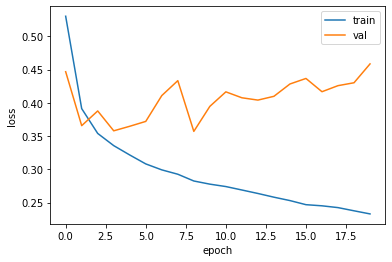

In [9]:
#검증 손실 = validation loss
import matplotlib.pyplot as plt

'''
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
'''

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())  
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy]) 히스토리 객체에는 훈련 측정값이 있는 history 딕셔너리가 loss accuracy로 존재

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


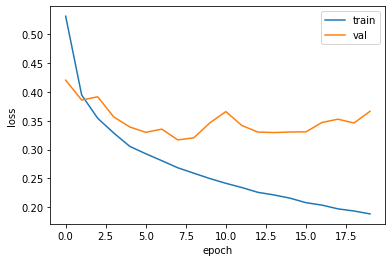

In [10]:
#아담 적용

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())  
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy]) 히스토리 객체에는 훈련 측정값이 있는 history 딕셔너리가 loss accuracy로 존재

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


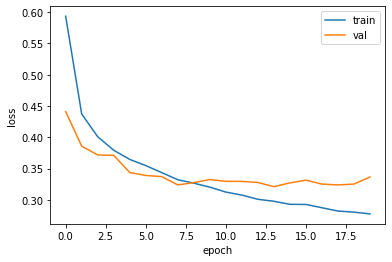

In [12]:
#드롭아웃? => 층에 있는 뉴런을 랜덤하게 꺼서 과대적합을 방지한다.
model = model_fn(keras.layers.Dropout(0.3))  #30프로 드롭아웃
model.summary()  #전체 출력 배열의 크기를 바꾸지는 않는다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())  
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy]) 히스토리 객체에는 훈련 측정값이 있는 history 딕셔너리가 loss accuracy로 존재

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


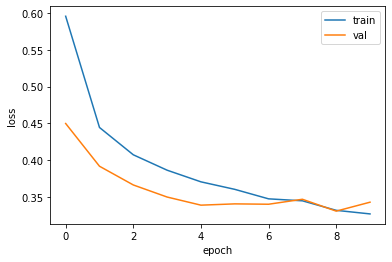

In [13]:
#드롭아웃 + epoch를 10으로 줄임
model = model_fn(keras.layers.Dropout(0.3))  #30프로 드롭아웃
model.summary()  #전체 출력 배열의 크기를 바꾸지는 않는다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())  
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy]) 히스토리 객체에는 훈련 측정값이 있는 history 딕셔너리가 loss accuracy로 존재

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
#모델 저장
model.save_weights('model-weights.h5')
model.save('model-whole.h5')


'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [15]:
''' => page 405 - 408 뭔소린지 모르겠음
#실험1. 훈련 하지 않은 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용.
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

'''

" => page 405 - 408 뭔소린지 모르겠음\n#실험1. 훈련 하지 않은 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용.\nmodel = model_fn(keras.layers.Dropout(0.3))\nmodel.load_weights('model-weights.h5')\n\n"

In [20]:
#콜백 -> 최상의 검증 점수를 만드는 모델을 지정.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [21]:
#load_model() 함수로 읽어서 다시 예측해보기
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 317us/step - loss: 0.3355 - accuracy: 0.1138


[0.3354938328266144, 0.11375000327825546]

In [22]:
#얼리스타핑도 같이.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
print(early_stopping_cb.stopped_epoch) #+>17


17


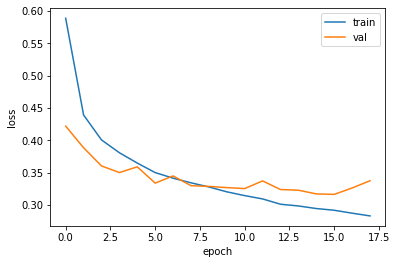

In [24]:
#데이터 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()